<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/jvcqp2iy2jlx2b32rmzdt0tx8lvxgzkp.png" width = 300, align = "center"></a>
<h1 align=center><font size = 5>GPU vs CPU</font></h1>

In [1]:
import sys
import numpy as np
import tensorflow as tf
from datetime import datetime

### List of CPU and GPUs
How to get list of CPU and GPUs ?

In [2]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]
get_available_gpus()

['/cpu:0', '/gpu:0', '/device:XLA_GPU:0', '/device:XLA_CPU:0']

What is __XLA__?
XLA (Accelerated Linear Algebra) is a domain-specific compiler for linear algebra that optimizes TensorFlow computations. The results are improvements in speed, memory usage, and portability on server and mobile platforms. Initially, most users will not see large benefits from XLA, but are welcome to experiment by using XLA via just-in-time (JIT) compilation or ahead-of-time (AOT) compilation. Developers targeting new hardware accelerators are especially encouraged to try out XLA.

The XLA framework is experimental and in active development. In particular, while it is unlikely that the semantics of existing operations will change, it is expected that more operations will be added to cover important use cases. The team welcomes feedback from the community about missing functionality and community contributions via GitHub.

### Logging device

I also recommend logging device placement when using GPUs, at this lets you easily debug issues relating to different device usage. This prints the usage of devices to the log, allowing you to see when devices change and how that affects the graph.

You can see that a, b and c are all run on GPU0



In [4]:
def print_logging_device():
    # Creates a graph.
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
    c = tf.matmul(a, b)
    # Creates a session with log_device_placement set to True.
    sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
    # Runs the op.
    print (sess.run(c))
print_logging_device()

[[ 22.  28.]
 [ 49.  64.]]


### Multiplication on gpu0 and cpu

In [7]:
print ("------- Multiplication on gpu0 vs cpu ---------")
def matrix_mul(device_name, matrix_sizes):
    time_values = []
    #device_name = "/cpu:0"
    for size in matrix_sizes:
        with tf.device(device_name):
            random_matrix = tf.random_uniform(shape=(2,2), minval=0, maxval=1)
            dot_operation = tf.matmul(random_matrix, tf.transpose(random_matrix))
            sum_operation = tf.reduce_sum(dot_operation)

        with tf.Session(config=tf.ConfigProto(log_device_placement=False)) as session:
            startTime = datetime.now()
            result = session.run(sum_operation)
        td = datetime.now() - startTime
        time_values.append(td.microseconds/1000)
        print ("matrix shape:" + str(size) + "  --"+ device_name +" time: "+str(td.microseconds/1000))
    return time_values


matrix_sizes = range(100,1000,100)
time_values_gpu = matrix_mul("/gpu:0", matrix_sizes)
time_values_cpu = matrix_mul("/cpu:0", matrix_sizes)
print ("GPU time" +  str(time_values_gpu))
print ("CPUtime" + str(time_values_cpu))
print ("--------------------------------")


------- Multiplication on gpu0 vs cpu ---------
matrix shape:100  --/gpu:0 time: 400.882
matrix shape:200  --/gpu:0 time: 22.797
matrix shape:300  --/gpu:0 time: 30.024
matrix shape:400  --/gpu:0 time: 36.174
matrix shape:500  --/gpu:0 time: 45.105
matrix shape:600  --/gpu:0 time: 49.3
matrix shape:700  --/gpu:0 time: 57.664
matrix shape:800  --/gpu:0 time: 64.049
matrix shape:900  --/gpu:0 time: 120.268
matrix shape:100  --/cpu:0 time: 77.829
matrix shape:200  --/cpu:0 time: 88.069
matrix shape:300  --/cpu:0 time: 90.07
matrix shape:400  --/cpu:0 time: 97.086
matrix shape:500  --/cpu:0 time: 103.114
matrix shape:600  --/cpu:0 time: 113.433
matrix shape:700  --/cpu:0 time: 117.401
matrix shape:800  --/cpu:0 time: 126.949
matrix shape:900  --/cpu:0 time: 134.569
GPU time[400.882, 22.797, 30.024, 36.174, 45.105, 49.3, 57.664, 64.049, 120.268]
CPUtime[77.829, 88.069, 90.07, 97.086, 103.114, 113.433, 117.401, 126.949, 134.569]
--------------------------------


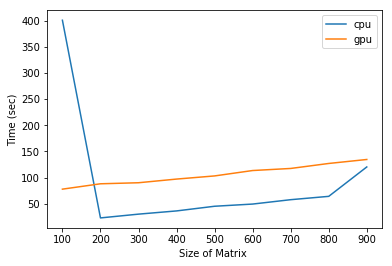

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.plot(matrix_sizes[:len(time_values_gpu)], time_values_gpu, label='cpu')
plt.plot(matrix_sizes[:len(time_values_cpu)], time_values_cpu, label='gpu')
plt.ylabel('Time (sec)')
plt.xlabel('Size of Matrix ')
plt.legend(loc='best')
plt.show()

## Want to learn more?

Running deep learning programs usually needs a high performance platform. PowerAI speeds up deep learning and AI. Built on IBM's Power Systems, PowerAI is a scalable software platform that accelerates deep learning and AI with blazing performance for individual users or enterprises. The PowerAI platform supports popular machine learning libraries and dependencies including Tensorflow, Caffe, Torch, and Theano. You can download a [free version of PowerAI](https://cocl.us/DX0108EN-PowerAI).

### Thanks for completing this lesson!


<h3>Authors:</h3>
<article class="teacher">
<div class="teacher-image" style="    float: left;
    width: 115px;
    height: 115px;
    margin-right: 10px;
    margin-bottom: 10px;
    border: 1px solid #CCC;
    padding: 3px;
    border-radius: 3px;
    text-align: center;"><img class="alignnone wp-image-2258 " src="https://media.licdn.com/mpr/mpr/shrinknp_400_400/AAEAAQAAAAAAAAyFAAAAJGJlM2I2MmQzLTkxOWQtNDVhZi1hZGU0LWNlOWQzZDcyYjQ3ZA.jpg" alt="Saeed Aghabozorgi" width="178" height="178" /></div>
<h4>Saeed Aghabozorgi</h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>
</article>

Coauthors:  <a href = "https://linkedin.com/in/luisotsm">Luis Otavio Silveira Martins</a>, <a href = "https://linkedin.com/in/erich-natsubori-sato"> Erich Natsubori Sato </a></h4>